In [6]:
%R dat <- as.data.frame(read.csv('output_final5.csv', sep = ",", header = TRUE));

<a id='content'></a>
# Content


## [a) Confidence Leak Model (Predicting Choice Confidence in Value Based Task](#confidence_leak)

## [b) Learning - Predicting Chosen Deck With Respect to Probability Differences of Two Decks](#learning) 

## [c) Model to Predict Payoff (Whether Participant Wins or Loses The Deck Task) - Payoff Model](#payoff) 

## [d) Model to Predict Whether Participant Chooses the Correct Deck (which has higher Probability of Payoff)](#correct_deck)

## [e) Data Diagnostics](#diag)

<a id='confidence_leak'></a>

# Model to Predict Choice Confidence in Value-Based (Deck) Task (Confidence Leak Model)

Abbreviations: 

conf2 = choice confidence in Value-Based Task

conf1 = choice confidence in Perceptual Task

rating_rt = Response time in Perceptual Task

rating_2_rt = Response time in Value-Based Task

participant = index of participants ( which are 4,5,6,7,8 and 9)

Answer = If participant wins Answer=1 else Answer=0

choose_correct_deck = If participants selects the deck with higher probability choose_correct_deck=1, else choose_correct_deck=0

In [7]:
%%R mod <- lmer(zConf2~ 0 + zConf1 + zRating_rt + zRating_2_rt + zRating_2_rt:zConf1 +
                (0 + zConf1 + zRating_rt + zRating_2_rt + zRating_2_rt:zConf1|participant), data = dat)

coefs <- data.frame(coef(summary(mod)))

df.KR <- get_ddf_Lb(mod, fixef(mod))

coefs$df.KR <-(rep(df.KR, each=4))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [7]:
%R summary(mod)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: 
zConf2 ~ 0 + zConf1 + zRating_rt + zRating_2_rt + zRating_2_rt:zConf1 +  
    (0 + zConf1 + zRating_rt + zRating_2_rt + zRating_2_rt:zConf1 |  
        participant)
   Data: dat

REML criterion at convergence: 4806.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8790 -0.6967 -0.1291  0.6481  6.3060 

Random effects:
 Groups      Name                Variance Std.Dev. Corr             
 participant zConf1              0.024252 0.15573                   
             zRating_rt          0.016292 0.12764   0.66            
             zRating_2_rt        0.036574 0.19124   0.08 -0.34      
             zConf1:zRating_2_rt 0.004484 0.06696   0.06  0.56  0.25
 Residual                        0.828806 0.91039                   
Number of obs: 1794, groups:  participant, 6

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)   
zCon

In [8]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'zConf1', 'zRating_rt', 'zRating_2_rt', 'zConf1:zRating_2_rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'zConf1', 'zRating_rt', 'zRating_2_rt', 'zConf1:zRating_2_rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['z_Perceptual Confidence', 'z_Perceptual Response Time', 'z_Value-Based Response Time', 'z_Perceptual Conf x z_Value-Based RT']
conf_table_exp1

,z_Perceptual Confidence,z_Perceptual Response Time,z_Value-Based Response Time,z_Perceptual Conf x z_Value-Based RT
coefficient,0.331079,-0.045486,-0.050086,-0.064671
se,0.067741,0.056957,0.081829,0.032945
t,4.887450,-0.798604,-0.612080,-1.963004
DF,6.282376,6.282376,6.282376,6.282376
CImax,0.398819,0.011471,0.031743,-0.031726
CImin,0.263338,-0.102442,-0.131915,-0.097616
p,0.002410,0.453640,0.561970,0.095130
SEmax,0.466560,0.068427,0.113572,0.001219
SEmin,0.195598,-0.159399,-0.213744,-0.130561


# Coefficient Table for Predicting Value-Based Confidence

Coefficients which are written in red are statistically significant.

[None]

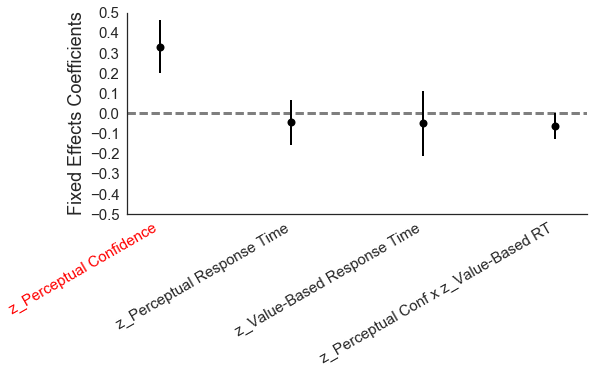

In [9]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='narrow', ylimits=(-0.5, 0.5), ymultiple = (0.1))
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:1]]

# Plotting of Prediction of Value-Based Confidence by Perceptual Confidence for each participant - Simplistic Confidence Leak Model

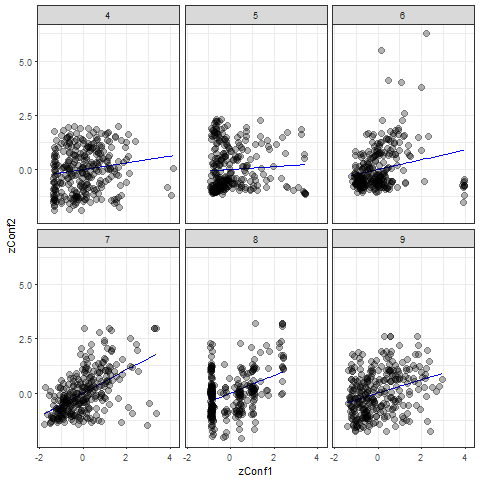

In [10]:
%%R 
mod_2 <- lmer(zConf2 ~ 1 +zConf1 + (1 + zConf1|participant), data = dat)
dat$mod_pred <- fitted(mod_2)
gg <- ggplot(dat, aes(x =zConf1, y = zConf2, group = participant)) +
    geom_line(aes(y = mod_pred), color = "blue") +
    geom_point(alpha = 0.3, size = 3) +
    facet_wrap(~participant) +
    theme_bw()

print(gg)

# Plotting of Prediction of Value-Based Confidence by Perceptual Confidence for all observations (pooled data)

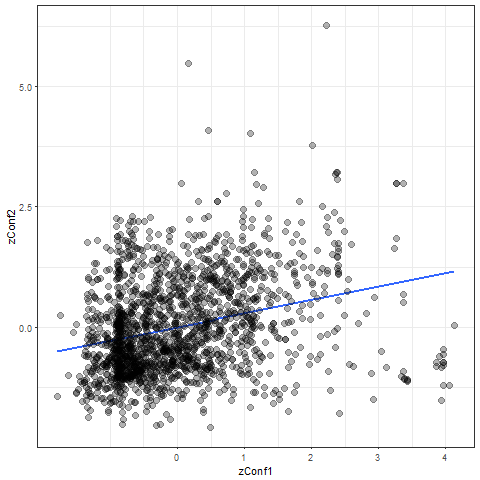

In [11]:
%%R 
gg <- ggplot(dat, aes(x = zConf1, y = zConf2)) +
    geom_smooth(method = "lm", se = FALSE) +
    geom_point(alpha = 0.3, size = 3) +
    theme_bw() + 
    scale_x_continuous(breaks = 0:50)

print(gg)

# [Back to Content](#content)

<a id='learning'></a>
# Learning - Predicting Chosen Deck With Respect to Probability Differences of Two Decks 
Chosen Deck = 1 (ORANGE), 0 (BLUE)

Prob_Diff= Payoff Probability of Orange Deck - Payoff Probabilty of Blue Deck

## Learning Model - Observed Data

In [12]:
%%R
mod_learning <- glmer(chosen_deck~0 + prob_diff +(1 + prob_diff|participant), data= dat, family = binomial(link="logit"))

In [9]:
%R summary(mod_learning)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: chosen_deck ~ 0 + prob_diff + (1 + prob_diff | participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2015.4   2037.3  -1003.7   2007.4     1790 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6781 -0.7174  0.1220  0.7297  3.9642 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.863228 0.92910       
             prob_diff   0.001345 0.03667  -0.90
Number of obs: 1794, groups:  participant, 6

Fixed effects:
          Estimate Std. Error z value Pr(>|z|)    
prob_diff 0.033644   0.007782   4.323 1.54e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Learning Model - Q Learning Algorithm

In [13]:
%%R 
alpha  <- 0.8 #learning rate
beta <- 0.2 # temperature
Qa <- rep(2,1794) #Orange Deck
Qb <- rep(2,1794) # Blue Deck
chosen_deck_q <- rep(2,1794) # algorithm chooses Orange deck(1) or Blue (0) deck
i <- 1
j <- 4

In [14]:
%%R 
while(j <=9){
    Qa <- rep(2,1794) #Orange Deck
    Qb <- rep(2,1794) # Blue Deck
    while(i<=1794){
    if (dat$participant[i] == j){
        if(exp(Qa[i]/beta) / (exp(Qa[i]/beta) + exp(Qb[i]/beta)) >= exp(Qb[i]/beta) / (exp(Qb[i]/beta) + exp(Qa[i]/beta))){
            if(dat$deck_prob1[i] >= dat$corr_deck_prob[i]){
                Qa[i+1] <- Qa[i] + alpha * 0 # prediction error -> expected outcome: 1 , actual = 1, error = 0
                Qb[i+1] <- Qb[i] }
            else if(dat$deck_prob1[i] < dat$corr_deck_prob[i]){
                Qa[i+1] <- Qa[i] + alpha * -1 # prediction error -> expected outcome: 1 , actual = 0, error = -1
                Qb[i+1] <- Qb[i] }
            chosen_deck_q[i] <- 1
        }
        else if(exp(Qb[i]/beta) / (exp(Qb[i]/beta) + exp(Qa[i]/beta)) > exp(Qa[i]/beta) / (exp(Qa[i]/beta) + exp(Qb[i]/beta)) ){
            if(dat$deck_prob2[i] >= dat$corr_deck_prob[i]){ 
                Qb[i+1] <- Qb[i] + alpha * 0 # prediction error -> expected outcome: 1 , actual = 1, error = 0
                Qa[i+1] <- Qa[i] }
            else if(dat$deck_prob2[i] < dat$corr_deck_prob[i]){
                Qb[i+1] <- Qb[i] + alpha * -1 # prediction error -> expected outcome: 1 , actual = 0, error = -1
                Qa[i+1] <- Qa[i]  }   
            chosen_deck_q[i] <- 0
        }
    
}   
    i <- i + 1      
}
    j <- j +1
    i <- 1

}

In [15]:
%R dat["q_chosen_deck"] <- chosen_deck_q

array([ 1.,  1.,  0., ...,  1.,  0.,  0.])

In [16]:
%R mod_q_learning <- glmer(q_chosen_deck ~ 0 + prob_diff + (1 + prob_diff|participant), family ='binomial', data = dat )

R object with classes: ('glmerMod',) mapped to:
<RS4 - Python:0x000002984293A748 / R:0x000002983ECBFF20>

In [8]:
%R summary(mod_q_learning)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: q_chosen_deck ~ 0 + prob_diff + (1 + prob_diff | participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2328.9   2350.8  -1160.4   2320.9     1790 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8316 -0.8044 -0.6247  0.8387  1.9046 

Random effects:
 Groups      Name        Variance  Std.Dev. Corr 
 participant (Intercept) 0.0028360 0.053255      
             prob_diff   0.0000194 0.004405 -1.00
Number of obs: 1794, groups:  participant, 6

Fixed effects:
          Estimate Std. Error z value Pr(>|z|)    
prob_diff 0.023279   0.002726    8.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

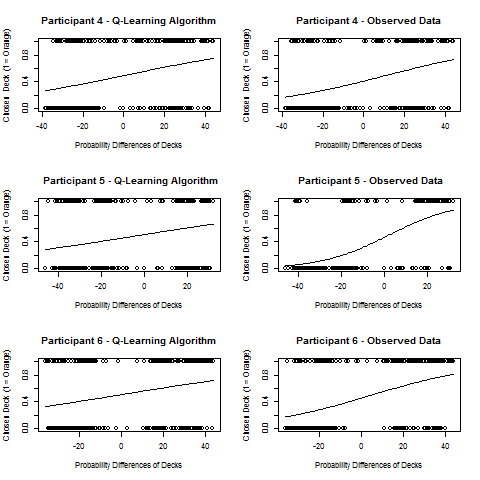

In [17]:
%%R old.par <- par(mfrow=c(3, 2))

plot (dat$prob_diff[dat$participant==4], dat$q_chosen_deck[dat$participant==4], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen  Deck (1 = Orange)', main = 'Participant 4 - Q-Learning Algorithm')
curve (invlogit( ranef(mod_q_learning)$participant[1, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[1, "prob_diff"]*x),add = TRUE)


plot (dat$prob_diff[dat$participant==4], dat$chosen_deck[dat$participant==4], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen  Deck (1 = Orange)', main = 'Participant 4 - Observed Data')
curve (invlogit( ranef(mod_learning)$participant[1, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[1, "prob_diff"]*x),add = TRUE)


plot (dat$prob_diff[dat$participant==5], dat$q_chosen_deck[dat$participant==5], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = ' Participant 5 - Q-Learning Algorithm')
curve (invlogit( ranef(mod_q_learning)$participant[2, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[2, "prob_diff"]*x),add = TRUE)


plot (dat$prob_diff[dat$participant==5], dat$chosen_deck[dat$participant==5], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = ' Participant 5 - Observed Data')
curve (invlogit( ranef(mod_learning)$participant[2, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[2, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==6], dat$q_chosen_deck[dat$participant==6], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 6 - Q-Learning Algorithm')
curve (invlogit( ranef(mod_q_learning)$participant[3, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[3, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==6], dat$chosen_deck[dat$participant==6], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 6 - Observed Data')
curve (invlogit( ranef(mod_learning)$participant[3, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[3, "prob_diff"]*x),add = TRUE)


par(old.par)


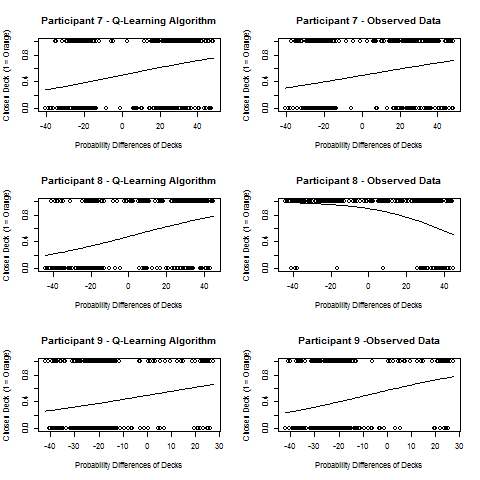

In [18]:
%%R old.par <- par(mfrow=c(3, 2))


plot (dat$prob_diff[dat$participant==7], dat$q_chosen_deck[dat$participant==7], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 7 - Q-Learning Algorithm')
curve (invlogit( ranef(mod_q_learning)$participant[4, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[4, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==7], dat$chosen_deck[dat$participant==7], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 7 - Observed Data')
curve (invlogit( ranef(mod_learning)$participant[4, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[4, "prob_diff"]*x),add = TRUE)


plot (dat$prob_diff[dat$participant==8], dat$q_chosen_deck[dat$participant==8], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 8 - Q-Learning Algorithm')
curve (invlogit(ranef(mod_q_learning)$participant[5, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[5, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==8], dat$chosen_deck[dat$participant==8], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 8 - Observed Data')
curve (invlogit(ranef(mod_learning)$participant[5, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[5, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==9], dat$q_chosen_deck[dat$participant==9], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 9 - Q-Learning Algorithm')
curve (invlogit(ranef(mod_q_learning)$participant[6, "(Intercept)"] + fixef(mod_q_learning)[1] * x +
       ranef(mod_q_learning)$participant[6, "prob_diff"]*x),add = TRUE)

plot (dat$prob_diff[dat$participant==9], dat$chosen_deck[dat$participant==9], xlab = "Probability Differences of Decks", 
      ylab = 'Chosen Deck (1 = Orange)', main = 'Participant 9 -Observed Data')
curve (invlogit( ranef(mod_learning)$participant[6, "(Intercept)"] + fixef(mod_learning)[1] * x +
       ranef(mod_learning)$participant[6, "prob_diff"]*x),add = TRUE)

par(old.par)

# [Back to Content](#content)

<a id='payoff'></a>
# Model to Predict Payoff (Answer -> 1 = Participant wins, 0 = Loses) - Payoff MODEL


In [19]:
%%R mod_log <- glmer(Answer~ 1 + zConf2 + zRating_2_rt + zRating_rt + zConf1 +( 0 + zConf2|participant), 
                     data = dat, family='binomial')
fix_1a <- fixef(mod_log)
fix_se_1a <- sqrt(diag(vcov(mod_log)))
names_1a <- names(fix_1a)

In [11]:
%R summary(mod_log)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Answer ~ 1 + zConf2 + zRating_2_rt + zRating_rt + zConf1 + (0 +  
    zConf2 | participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2473.5   2506.5  -1230.8   2461.5     1788 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8732 -1.0312  0.7824  0.9477  1.1678 

Random effects:
 Groups      Name   Variance Std.Dev.
 participant zConf2 0.002485 0.04985 
Number of obs: 1794, groups:  participant, 6

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.13134    0.04758   2.760  0.00577 ** 
zConf2        0.19397    0.05490   3.533  0.00041 ***
zRating_2_rt -0.03603    0.05073  -0.710  0.47755    
zRating_rt    0.02167    0.04999   0.433  0.66471    
zConf1        0.01708    0.05137   0.332  0.73953    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed E

In [20]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'zConf2', 'zRating_2_rt', 'zRating_rt', 'zConf1']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['(Intercept)', 'z_Value-Based Confidence', 'z_Value-Based Response Time', " z_Perceptual Response Time", 
                             'z_Perceptual Confidence']
choice_table_exp1

,(Intercept),z_Value-Based Confidence,z_Value-Based Response Time,z_Perceptual Response Time,z_Perceptual Confidence
coefficient,0.131336,0.193971,-0.036028,0.021667,0.017079
se,0.047578,0.054897,0.050726,0.049990,0.051370
CImin,0.038083,0.086373,-0.135452,-0.076314,-0.083606
CImax,0.224589,0.301570,0.063396,0.119648,0.117764


[None]

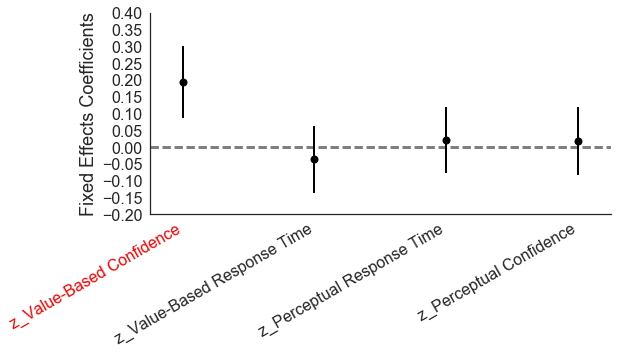

In [21]:
Coefpresplot(choice_table_exp1, title='', ticklabsize=16, size='narrow',
             ylimits=(-0.2, 0.4), ymultiple=0.05)
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:1]]

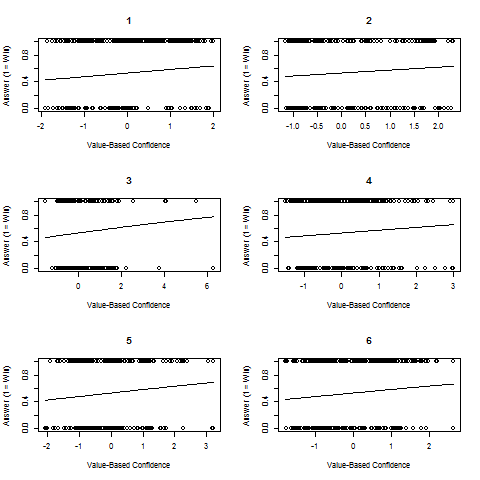

In [22]:
%%R
old.par <- par(mfrow=c(3, 2))

plot (dat$zConf2[dat$participant==4], dat$Answer[dat$participant ==4],, xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = '1')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[1, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==5], dat$Answer[dat$participant ==5], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main ='2' )
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[2, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==6], dat$Answer[dat$participant ==6], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = '3')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[3, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==7], dat$Answer[dat$participant ==7], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = '4')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[4, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==8], dat$Answer[dat$participant ==8], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = '5')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[5, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==9], dat$Answer[dat$participant ==9], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = '6')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[6, c('zConf2')]*x), add = TRUE)

par(old.par)

# [Back to Content](#content)

<a id="correct_deck"></a>
# Hierarchical Regression of Correct Deck Choice (whether participant chooses the deck with higher probability)  - CORRECT DECK MODEL

In [23]:
%%R 
mod_log_1 <- glmer(choose_correct_deck ~ 1 + zConf2 + zRating_2_rt + zRating_rt + (0+ zRating_rt|participant) +
                  (1|participant) +(0 + zConf2|participant), data = dat, family = 'binomial')

fix_2a <- fixef(mod_log_1)
fix_se_2a <- sqrt(diag(vcov(mod_log_1)))
names_2a <- names(fix_2a)

In [13]:
%R summary(mod_log_1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choose_correct_deck ~ 1 + zConf2 + zRating_2_rt + zRating_rt +  
    (0 + zRating_rt | participant) + (1 | participant) + (0 +  
    zConf2 | participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2076.3   2114.7  -1031.2   2062.3     1787 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4646 -0.8092  0.4305  0.7332  1.4664 

Random effects:
 Groups        Name        Variance Std.Dev.
 participant   zRating_rt  0.0759   0.2755  
 participant.1 (Intercept) 0.8228   0.9071  
 participant.2 zConf2      0.6181   0.7862  
Number of obs: 1794, groups:  participant, 6

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.89362    0.37837   2.362   0.0182 *
zConf2        0.62787    0.33322   1.884   0.0595 .
zRating_2_rt  0.13007    0.05746   2.264   0.0236 *
zRating_rt    0.12200    0.12890   0.94

In [24]:
%R -o fix_2a -o fix_se_2a -o names_2a
choice_table2_exp1 = regtable(fix_2a, fix_se_2a, names_2a)
choice_table2_exp1
cols = [ '(Intercept)', 'zConf2', 'zRating_2_rt', 'zRating_rt']
choice_table2_exp1 = choice_table2_exp1[cols]
choice_table2_exp1.columns = ['(Intercept)', 'z_Value-Based Confidence', 'z_Value-Based Response Time ', 'z_Perceptual Response Time']
choice_table2_exp1

,(Intercept),z_Value-Based Confidence,z_Value-Based Response Time,z_Perceptual Response Time
coefficient,0.893623,0.627867,0.130066,0.122005
se,0.378375,0.333219,0.057456,0.128904
CImin,0.152008,-0.025242,0.017453,-0.130646
CImax,1.635238,1.280975,0.242679,0.374656


[None]

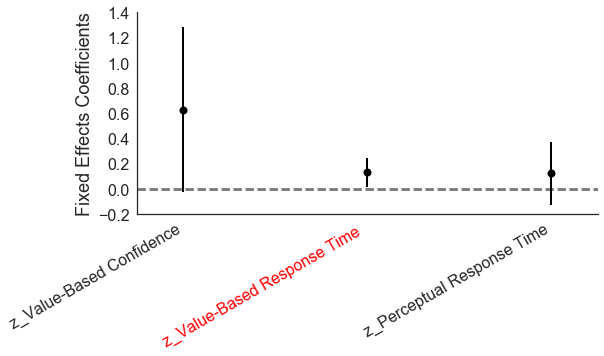

In [25]:
Coefpresplot(choice_table2_exp1, title='', ticklabsize=16, size='narrow',
             ylimits=(-0.2, 1.4), ymultiple=0.2)
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[1:2]]

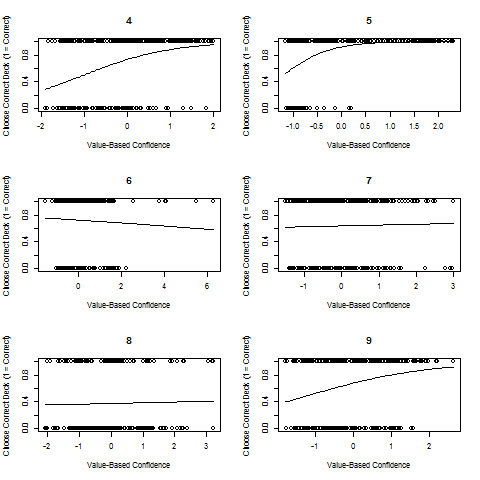

In [27]:
%%R
old.par <- par(mfrow=c(3, 2))

plot (dat$zConf2[dat$participant==4], dat$choose_correct_deck[dat$participant==4], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main = '4')
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[1, c('(Intercept)')] +
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[1, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==5], dat$choose_correct_deck[dat$participant==5], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main ='5' )
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[2, c('(Intercept)')] +
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[2, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==6], dat$choose_correct_deck[dat$participant==6], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main = '6')
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[3, c('(Intercept)')] +
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[3, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==7], dat$choose_correct_deck[dat$participant==7], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main = '7')
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[4, c('(Intercept)')] + 
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[4, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==8], dat$choose_correct_deck[dat$participant==8], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main = '8')
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[5, c('(Intercept)')] + 
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[5, c('zConf2')]*x), add = TRUE)

plot (dat$zConf2[dat$participant==9], dat$choose_correct_deck[dat$participant==9], xlab = "Value-Based Confidence", ylab = 'Choose Correct Deck (1 = Correct)', main = '9')
curve (invlogit ( fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[6, c('(Intercept)')] + 
       fixef(mod_log_1)[2]*x + ranef(mod_log_1)$participant[6, c('zConf2')]*x), add = TRUE)

par(old.par)

# [Back to Content](#content)

<a id='diag'></a>
# Data Diagnostics

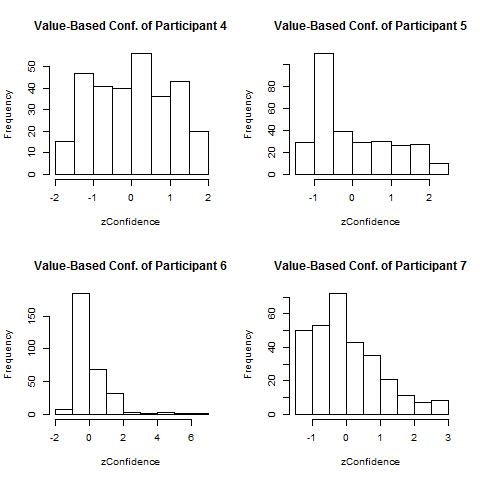

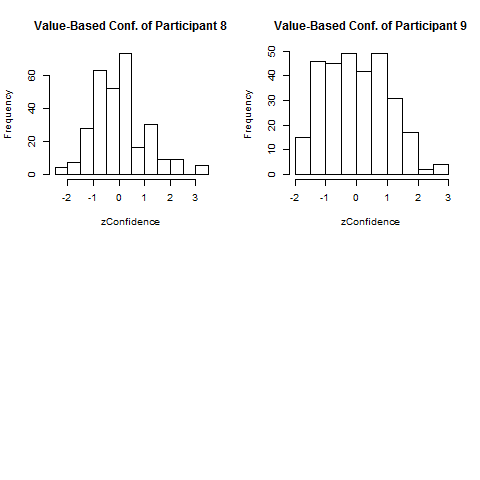

In [28]:
%%R
old.par <- par(mfrow=c(2, 2))
hist(dat$zConf2[dat$participant == 4], main = 'Value-Based Conf. of Participant 4', xlab = 'zConfidence')
hist(dat$zConf2[dat$participant == 5], main = 'Value-Based Conf. of Participant 5', xlab = 'zConfidence')
hist(dat$zConf2[dat$participant == 6], main = 'Value-Based Conf. of Participant 6', xlab = 'zConfidence')
hist(dat$zConf2[dat$participant == 7], main = 'Value-Based Conf. of Participant 7', xlab = 'zConfidence')
hist(dat$zConf2[dat$participant == 8], main = 'Value-Based Conf. of Participant 8', xlab = 'zConfidence')
hist(dat$zConf2[dat$participant == 9], main = 'Value-Based Conf. of Participant 9', xlab = 'zConfidence')
par(old.par)

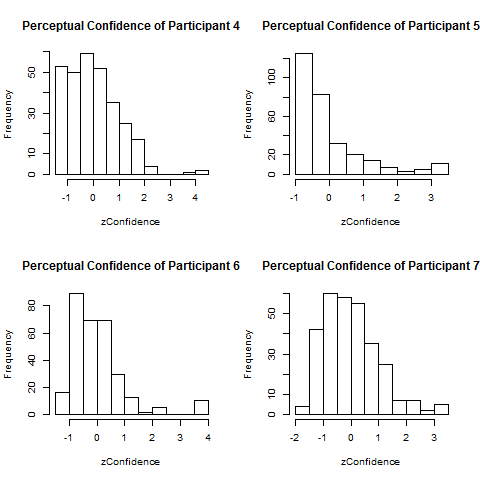

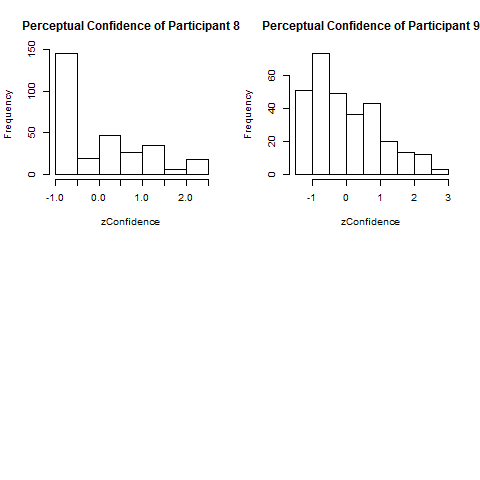

In [29]:
%%R
old.par <- par(mfrow=c(2, 2))
hist(dat$zConf1[dat$participant == 4], main = 'Perceptual Confidence of Participant 4', xlab = 'zConfidence')
hist(dat$zConf1[dat$participant == 5], main = 'Perceptual Confidence of Participant 5', xlab = 'zConfidence')
hist(dat$zConf1[dat$participant == 6], main = 'Perceptual Confidence of Participant 6', xlab = 'zConfidence')
hist(dat$zConf1[dat$participant == 7], main = 'Perceptual Confidence of Participant 7', xlab = 'zConfidence')
hist(dat$zConf1[dat$participant == 8], main = 'Perceptual Confidence of Participant 8', xlab = 'zConfidence')
hist(dat$zConf1[dat$participant == 9], main = 'Perceptual Confidence of Participant 9', xlab = 'zConfidence')
par(old.par)

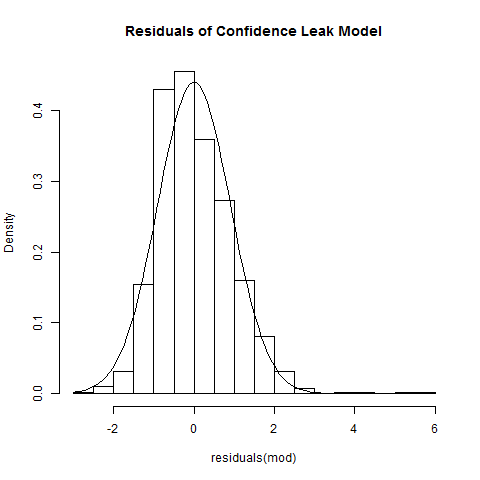

In [30]:
%%R 
hist(residuals(mod),prob=TRUE, main = 'Residuals of Confidence Leak Model')
curve(dnorm(x,mean=0,sd=sd(residuals(mod))),add=TRUE)

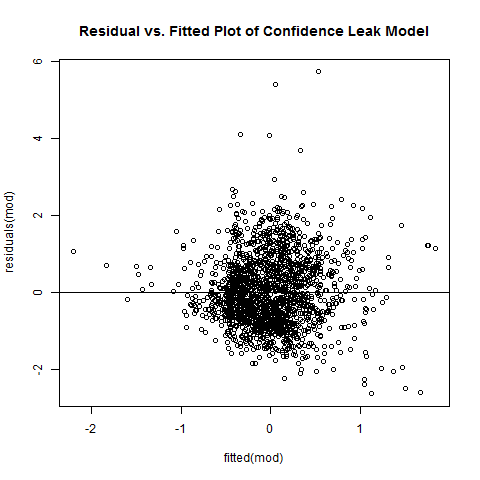

In [31]:
%%R 
plot(fitted(mod), residuals(mod), main = 'Residual vs. Fitted Plot of Confidence Leak Model')
abline(h = 0)

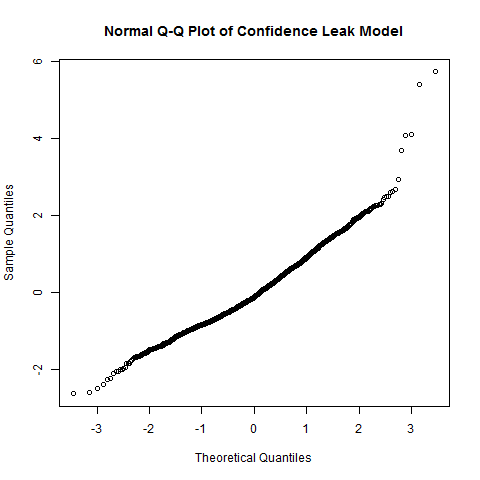

In [32]:
%%R 
qqnorm(residuals(mod), main = "Normal Q-Q Plot of Confidence Leak Model")

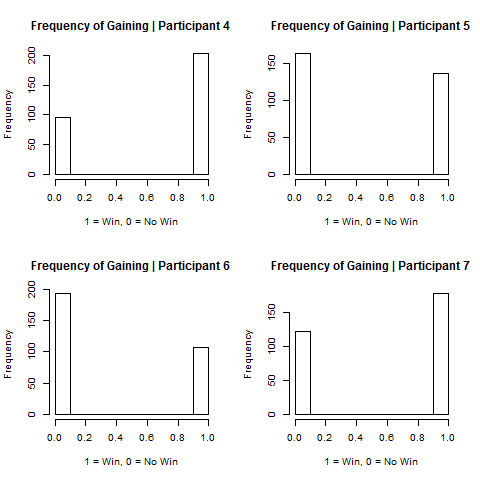

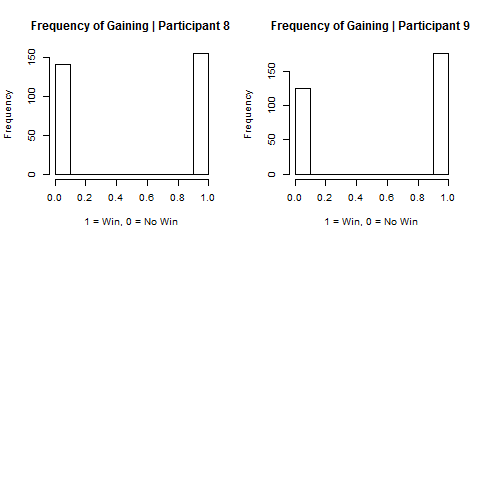

In [33]:
%%R
old.par <- par(mfrow=c(2, 2))

hist(dat$Answer[dat$participant==4], main = 'Frequency of Gaining | Participant 4', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==5], main = 'Frequency of Gaining | Participant 5', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==6], main = 'Frequency of Gaining | Participant 6', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==7], main = 'Frequency of Gaining | Participant 7', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==8], main = 'Frequency of Gaining | Participant 8', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==9], main = 'Frequency of Gaining | Participant 9', xlab = '1 = Win, 0 = No Win')

par(old.par)

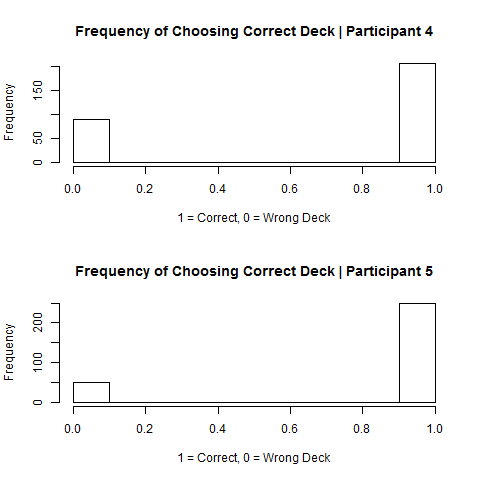

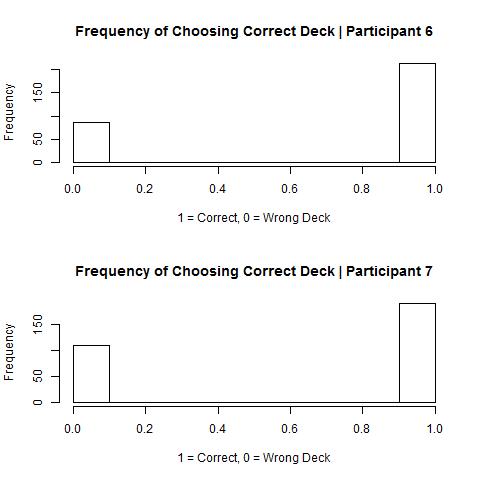

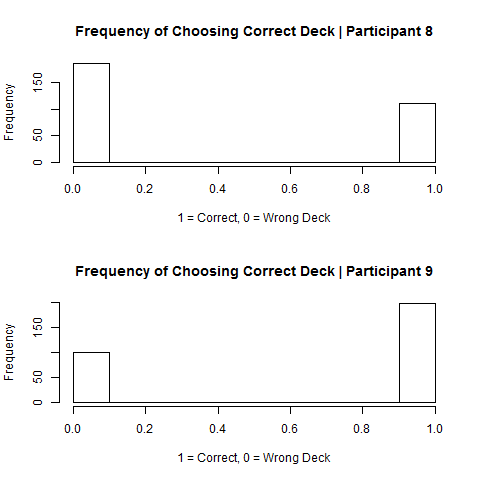

In [34]:
%%R
old.par <- par(mfrow=c(2, 1))

hist(dat$choose_correct_deck[dat$participant==4], main = 'Frequency of Choosing Correct Deck | Participant 4', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==5], main = 'Frequency of Choosing Correct Deck | Participant 5', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==6], main = 'Frequency of Choosing Correct Deck | Participant 6', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==7], main = 'Frequency of Choosing Correct Deck | Participant 7', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==8], main = 'Frequency of Choosing Correct Deck | Participant 8', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==9], main = 'Frequency of Choosing Correct Deck | Participant 9', xlab = '1 = Correct, 0 = Wrong Deck')

par(old.par)

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab
import glob

# Show graphs in Notebook
%matplotlib inline

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(15, 15);

# Set up interface with R
import rpy2
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


C:\Users\Ecem\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
%%R
library("devtools")
library("lme4")
library("plotly")
library("LaplacesDemon")
library("ggplot2")
library("lmerTest")
library("optimx")
library("gdata")
library("Formula")
library("miscTools")
library("maxLik")
library("mlogit")
library("pbkrtest")
library("foreign")
library("MASS")
library("car")
library("tools")
library("nlme")
library('interplot')
library('lattice')

In [4]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [5]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=30)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()